##### Download, normalize and split vol cube data into train/test datasets

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Download the data
from src.data.vol.get_vol_cube_tenors_strikes_dates import get_vol_cube_tenors_strikes_dates
data, opt_tenors, swap_tenors, strikes, dates = get_vol_cube_tenors_strikes_dates()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

# Split train and test datasets
dataset_split_type = 'temporal_split'
from src.utils.get_train_test_datasets import get_train_test_datasets
data_norm_train, dates_train, data_norm_test, dates_test = get_train_test_datasets(data_norm,
                                                                                   dates,
                                                                                   type=dataset_split_type)

data_train = normalizer.denormalize(data_norm_train)
data_test = normalizer.denormalize(data_norm_test)

Train data plots

max value 226.00000000000009 is for such combination of indexes of tenors and strikes: [2, 0, 0]


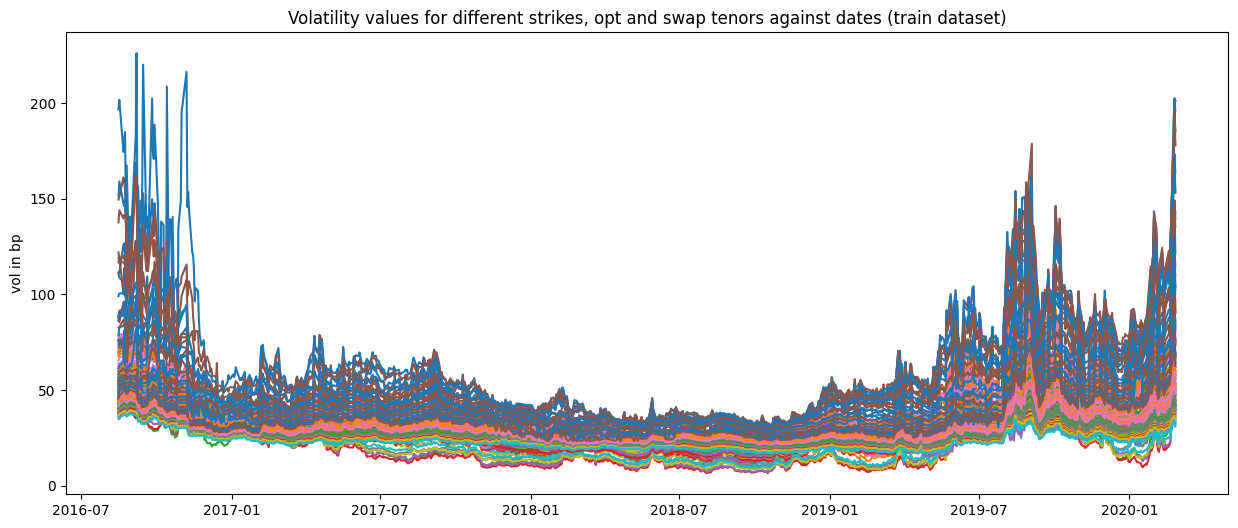

In [4]:
import matplotlib.pyplot as plt
maxv = float('-inf')
maxv_id = None

plt.figure(figsize=(15,6))
for n1  in range(data.shape[1]):
    for n2  in range(data.shape[2]):
        for n3  in range(data.shape[3]):
            if data_train[:, n1, n2, n3].max() > maxv:
                maxv_id = [n1, n2, n3]
                maxv = data_train[:, n1, n2, n3].max()
            plt.plot(dates_train[:], data_train[:, n1, n2, n3])
plt.ylabel('vol in bp')
plt.title('Volatility values for different strikes, opt and swap tenors against dates (train dataset)')
print(f'max value {maxv} is for such combination of indexes of tenors and strikes: {maxv_id}')
plt.show()

Test data plots

max value 246.22999999999996 is for such combination of indexes of tenors and strikes: [0, 0, 0]


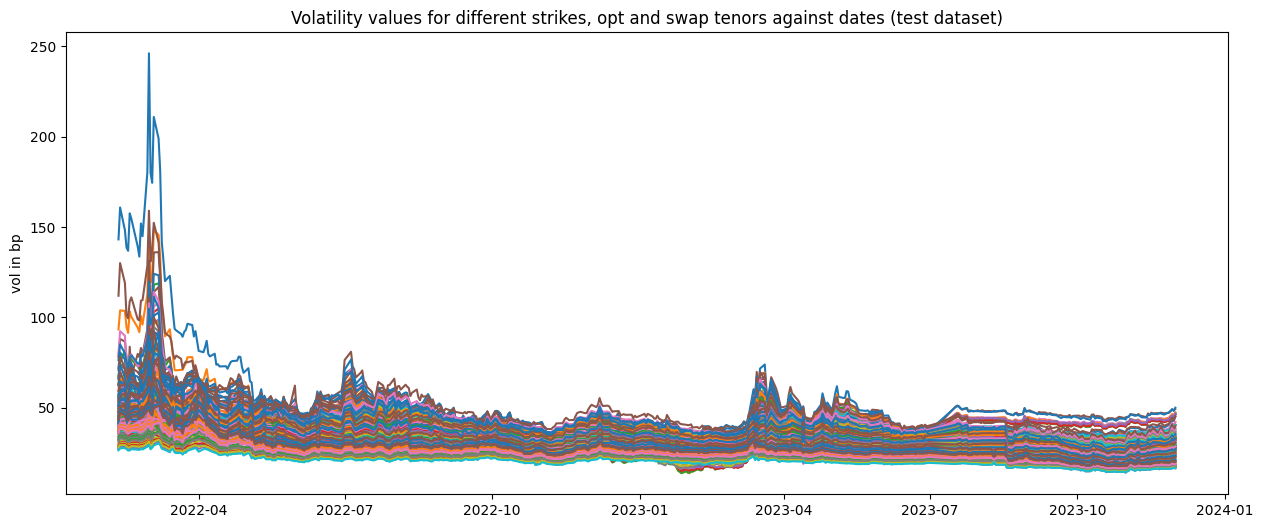

In [5]:
import matplotlib.pyplot as plt
maxv = float('-inf')
maxv_id = None

plt.figure(figsize=(15,6))
for n1  in range(data.shape[1]):
    for n2  in range(data.shape[2]):
        for n3  in range(data.shape[3]):
            if data_test[:, n1, n2, n3].max() > maxv:
                maxv_id = [n1, n2, n3]
                maxv = data_test[:, n1, n2, n3].max()
            plt.plot(dates_test[:], data_test[:, n1, n2, n3])
plt.ylabel('vol in bp')
print(f'max value {maxv} is for such combination of indexes of tenors and strikes: {maxv_id}')
plt.title('Volatility values for different strikes, opt and swap tenors against dates (test dataset)')
plt.show()